# Ciencia de los datos
Tenemos un conjunto de datos de temperatura y humedad de una casa recojidos por aproximadamente 5 meses.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists

In [4]:
full_data = pd.read_csv("C:\\Users\\santiago\\Downloads\\KAG_energydata_complete.csv")
full_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
columnas_deseadas = ["T8", "RH_8"]
data = full_data[columnas_deseadas]

# Significado de las variables
T8 temperatura en la sala.
RH_8 humedad en la sala.
Escogimos este subconjunto de columnas por ser un punto strategico en la casa.


## Descripción de las variables
No hubo que hacer ninguna conversión de datos, se trabajo con temperatura en celcius y humedad en porcentaje.

In [7]:
data.describe()

,T8,RH_8
count,19735.000000,19735.000000
mean,22.029107,42.936165
std,1.956162,5.224361
min,16.306667,29.600000
25%,20.790000,39.066667
50%,22.100000,42.375000
75%,23.390000,46.536000
max,27.230000,58.780000


In [8]:
%matplotlib inline

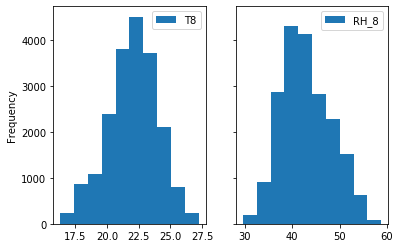

In [9]:
figure, axs = plt.subplots(1,2, sharey=True, sharex=False)
data.plot(kind="hist", y="T8", ax=axs[0])
data.plot(kind="hist", y="RH_8", ax=axs[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x17f6af3ee48>,
 'caps': [<matplotlib.lines.Line2D at 0x17f6af4bb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f6af2e748>],
 'medians': [<matplotlib.lines.Line2D at 0x17f6af4bf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f6af59550>],
 'means': []}

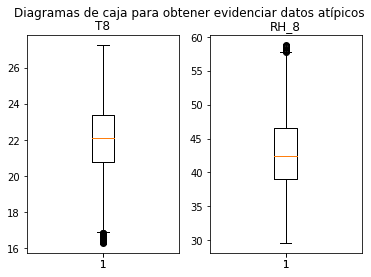

In [10]:
figure, axs = plt.subplots(1,2, sharey=False, sharex=True)
figure.suptitle('Diagramas de caja para obtener evidenciar datos atípicos')
axs[0].set_title("T8")
axs[0].boxplot(data["T8"])

axs[1].set_title("RH_8")
axs[1].boxplot(data["RH_8"])


In [13]:
data["T8"].describe()

count    19735.000000
mean        22.029107
std          1.956162
min         16.306667
25%         20.790000
50%         22.100000
75%         23.390000
max         27.230000
Name: T8, dtype: float64

In [14]:
data["RH_8"].describe()

count    19735.000000
mean        42.936165
std          5.224361
min         29.600000
25%         39.066667
50%         42.375000
75%         46.536000
max         58.780000
Name: RH_8, dtype: float64

In [17]:
quantile1T = data["T8"].quantile(0.25)
quantile3T = data["T8"].quantile(0.75)
rango_intercuartilT = quantile3T - quantile1T
rango_intercuartilT

2.6000000000000014

In [18]:
quantile1H = data["RH_8"].quantile(0.25)
quantile3H = data["RH_8"].quantile(0.75)
rango_intercuartilH = quantile3H - quantile1H
rango_intercuartilH

7.46933333333331

# Busqueda de datos atipicos
Los datos que estén por izquierda 1.5 veces el rango intercuartílico del primer cuantil son considerados datos atipicos. Con un razonamiento similar por derecha.
En este caso particular podemos ver que ese límite por izquierda sería 16.89 y por derecha 24.69 para T8. Y para humedad el limite por la izquierda sería 27.86 y por derecha 50.27.
Se procederá a eliminar estos datos atípicos que podrían afectarnos en el futuro.

In [19]:
inferiorT = quantile1T - 1.5* rango_intercuartilT
inferiorT

16.889999999999997

In [20]:
superiorT = quantile1T + 1.5* rango_intercuartilT
superiorT

24.69

In [22]:
datos_atípicosT = data[(data["T8"] < inferiorT) | (data["T8"] > superiorT)]
datos_atípicosT.shape

(1583, 2)

In [23]:
inferiorH = quantile1H - 1.5* rango_intercuartilH
inferiorH

27.862666666666726

In [24]:
superiorH = quantile1H + 1.5* rango_intercuartilH
superiorH

50.270666666666656

In [28]:
datos_atípicosH = data[(data["RH_8"] < inferiorH) | (data["RH_8"] > superiorH)]
datos_atípicosH.shape

(2038, 2)

## Vamos a quedarnos con un dataset sin estos datos atípicos

In [36]:
data1 = data[(data["T8"] >= inferiorT) & (data["T8"] <= superiorT)]
data1 = data[(data["RH_8"] >= inferiorH) & (data["RH_8"] <= superiorH)]
data1.shape

(17697, 2)

## Vamos a buscar valores nulos
Según el siguiente análisis, al intentar eliminar las filas que tienen alguna columna en nulo, podemos ver que no sucede nada, es decir no hay filas que tengan alguna columna en nulo.

In [37]:
data1.dropna(axis=0, how="any")
data1.shape

(17697, 2)